In [ ]:
# This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using teh past 60 day stock price

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Get the stock update 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-10')
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,129.410004
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,131.009995
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.599998


In [5]:
#Get the number of rows and columns in the data set
df.shape

(2270, 6)

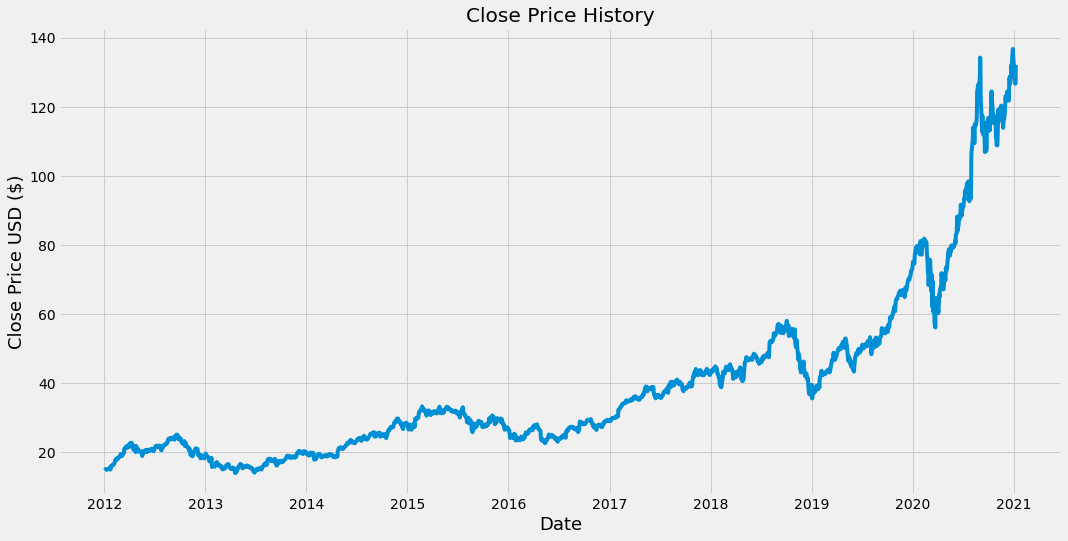

In [6]:
#Visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array 
dataset = data.values 
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

1816

In [8]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [0.91779535],
       [0.95299098],
       [0.96219729]])

In [9]:
#Create the training data set
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00

In [10]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1756, 60, 1)

In [12]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1756/1756 [==============================] - 44s 23ms/step - loss: 5.6512e-04


In [15]:
#Create the testing data set 
#Create a new array containing scaled values from index 1756 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [16]:
#Convert the data to a numpy array 
x_test = np.array(x_test)


In [17]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

8.691117458931675

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


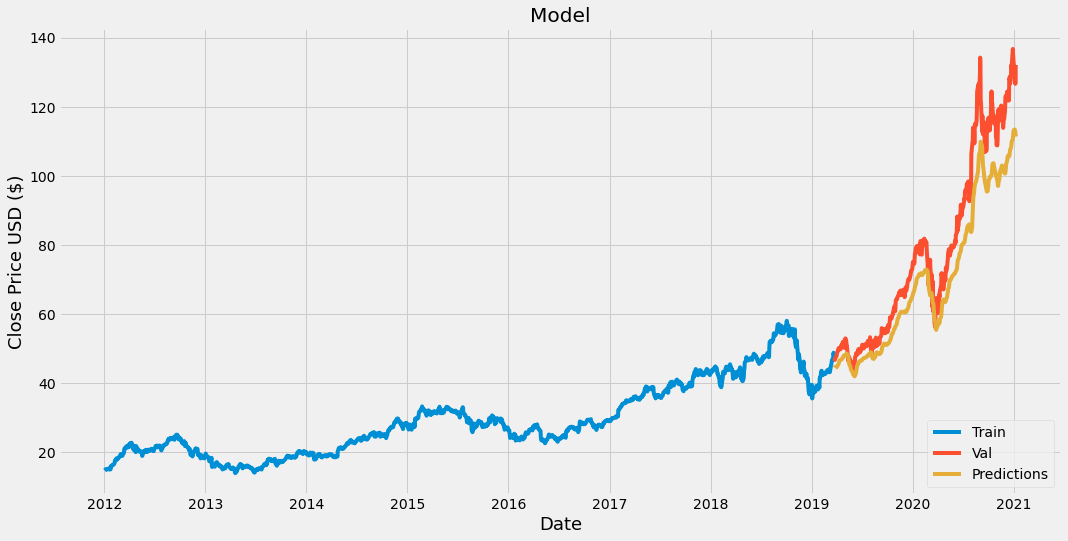

In [21]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
#Show the valid and prediction prices 
valid

,Close,Predictions
Date,,
2019-03-25,47.185001,44.454536
2019-03-26,46.697498,44.634197
2019-03-27,47.117500,44.652168
2019-03-28,47.180000,44.622761
2019-03-29,47.487499,44.576466
...,...,...
2021-01-04,129.410004,113.383957
2021-01-05,131.009995,113.040321
2021-01-06,126.599998,112.649506


In [23]:
#Get the quote 
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-10')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and conver the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array 
X_test = np.array(X_test)
#Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price 
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[111.18951]]


In [28]:
#Get the quote 
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start = '2021-01-11', end='2021-01-11')
print(apple_quote2['Close'])

Date
2021-01-11    128.979996
Name: Close, dtype: float64
